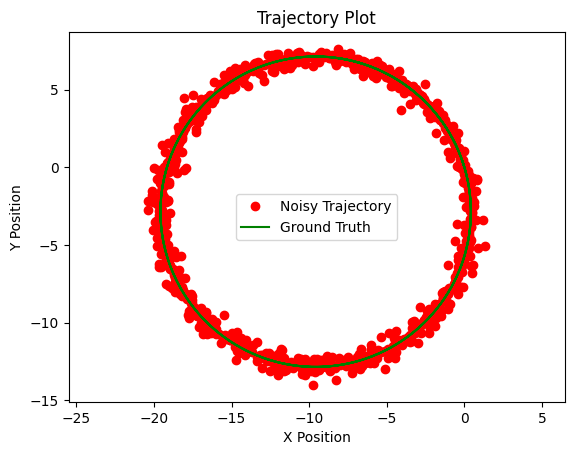

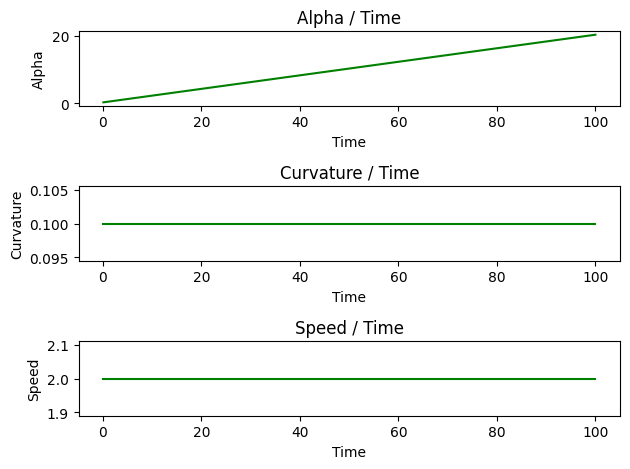

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def generate_values():
    vv = np.concatenate([np.zeros(100), np.arange(0.2, 2.2, 0.2), np.full(350, 2), 
                         np.arange(2.1, 3.1, 0.1), np.full(100, 3), np.arange(2.8, 0.8, -0.2), 
                         np.full(350, 1), np.arange(0.9, -0.1, -0.1), np.zeros(60)])
    kk = np.concatenate([np.zeros(150), np.arange(0.05, 0.45, 0.05), np.full(30, 0.4), 
                         np.arange(0.35, -0.05, -0.05), np.zeros(80), np.arange(-0.1, -0.9, -0.1),
                         np.full(11, -0.8), np.arange(-0.7, 0.1, 0.1), np.zeros(100), 
                         np.arange(-0.02, -0.22, -0.02), np.full(55, -0.2), np.arange(-0.18, 0.02, 0.2), 
                         np.zeros(35), np.arange(0.02, 0.22, 0.02), np.full(55, 0.2), np.arange(0.18, -0.02, -0.2), 
                         np.zeros(145), np.arange(0.01, 0.11, 0.01), np.full(165, 0.1), np.arange(0.09, -0.01, -0.01),
                         np.zeros(100)])
    return vv, kk

def generate_values_circle(radius, speed, num_points):
    """
    Generate values for circular trajectory.
    :param radius: Radius of the circle.
    :param speed: Constant speed.
    :param num_points: Number of points in the trajectory.
    :return: Arrays of vv (speed) and kk (curvature).
    """
    curvature = 1 / radius  # Curvature is 1/radius for a circle
    vv = np.full(num_points, speed)  # Constant speed
    kk = np.full(num_points, curvature)  # Constant curvature for a circle

    return vv, kk


def calculate_trajectory(vv, kk, D, Ts):
    vl = vv / (1 - kk * 0.5 * D)
    vr = vv / (1 + kk * 0.5 * D)
    t = Ts * np.arange(1, len(vv) + 1)
    xx, yy, aa, sl, sr = [0], [0], [0.3], [0.0211], [0]
    
    for k in range(1, len(vv)):
        xx.append(xx[-1] - vv[k - 1] * Ts * np.sin(aa[-1]))
        yy.append(yy[-1] + vv[k - 1] * Ts * np.cos(aa[-1]))
        aa.append(aa[-1] + vv[k - 1] * Ts * kk[k - 1])
        sl.append(sl[-1] + vl[k - 1] * Ts)
        sr.append(sr[-1] + vr[k - 1] * Ts)
    
    sl = np.round(100 * np.array(sl)) / 100
    sr = np.round(100 * np.array(sr)) / 100
    
    return np.array(xx), np.array(yy), np.array(aa), sl, sr, t


def add_noise(xx, yy, Rxy):
    # Transpose Rxy to match the shape of the [xx, yy] array
    Rxy_transposed = Rxy.T
    y = np.vstack([xx, yy]).T + np.sqrt(Rxy_transposed) * np.random.randn(*Rxy_transposed.shape)
    return y

def save_data(t, y, xx, yy, aa, kk, vv, filename):
    data = pd.DataFrame({
        'time': t,
        'Pos_x': y[:, 0],
        'Pos_y': y[:, 1],
        'GT_x': xx,
        'GT_y': yy,
        'GT_alpha': aa,
        'GT_Kr': kk,
        'GT_v': vv
    })
    data.to_csv(filename, sep=',', index=False)

def plot_data(y, xx, yy, t, aa, kk, vv):
    plt.figure(1)
    plt.clf()
    plt.plot(y[:, 0], y[:, 1], 'r:', label='Noisy Trajectory')
    plt.plot(xx, yy, 'g', label='Ground Truth')
    plt.title('Trajectory Plot')
    plt.xlabel('X Position')
    plt.ylabel('Y Position')
    plt.legend()
    plt.axis('equal')
    
    plt.figure(2)
    plt.clf()
    
    plt.subplot(311)
    plt.plot(t, aa, 'g')
    plt.title('Alpha / Time')
    plt.xlabel('Time')
    plt.ylabel('Alpha')
    
    plt.subplot(312)
    plt.plot(t, kk, 'g')
    plt.title('Curvature / Time')
    plt.xlabel('Time')
    plt.ylabel('Curvature')

    plt.subplot(313)
    plt.plot(t, vv, 'g')
    plt.title('Speed / Time')
    plt.xlabel('Time')
    plt.ylabel('Speed')

    plt.tight_layout()
    plt.show()

# Rest of the code remains the same


def main():
    D = 0.1
    Ts = 0.1

    radius = 10  # Example radius for circular trajectory
    speed = 2    # Example constant speed
    num_points = 1000  # Number of points in the trajectory
    vv, kk = generate_values_circle(radius, speed, num_points)

    # vv, kk = generate_values()
    xx, yy, aa, sl, sr, t = calculate_trajectory(vv, kk, D, Ts)

    # Corrected Rxy generation
    Rxy_lengths = [200, 50, 100, 30, 300, 220, 100]
    Rxy_values = [0.5, 5, 1, 5, 20, 10, 1]
    Rxy = np.hstack([np.full((2, length), value) for length, value in zip(Rxy_lengths, Rxy_values)]) * 1e-2
    # Rxy = 1e-2 * np.concatenate([np.full(200, 0.5), np.full(50, 5), np.full(100, 1), 
    #                              np.full(30, 5), np.full(300, 20), np.full(220, 10), np.full(100, 1)])
    y = add_noise(xx, yy, Rxy)
    save_data(t, y, xx, yy, aa, kk, vv, 'xy2.csv')
    plot_data(y, xx, yy, t, aa, kk, vv)


if __name__ == "__main__":
    main()



